In [1]:
%load_ext watermark
%watermark -u -d -v -p numpy,matplotlib,scipy,pandas,sklearn,mlxtend

last updated: 2017-04-26 

CPython 2.7.10
IPython 5.3.0

numpy 1.12.1
matplotlib 2.0.0
scipy 0.19.0
pandas 0.19.2
sklearn 0.18.1
mlxtend 0.6.0


In [2]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.apionly as sns

import comptools as comp
import comptools.analysis.plotting as plotting

/home/jbourbeau/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
comp_class = True
comp_list = ['light', 'heavy'] if comp_class else ['P', 'He', 'O', 'Fe']

In [4]:
df_sim = comp.load_dataframe(datatype='sim')

sim quality cut event flow:
             IceTopQualityCuts:    1.0    1.0
         lap_InIce_containment:  0.776  0.776
              InIceQualityCuts:  0.786   0.75
                 num_hits_1_60:  0.999   0.75
             reco_energy_range:  0.837  0.623
                 IceTop_charge:  0.896  0.562




/home/jbourbeau/cr-composition/comptools/dataframe_functions.py:145: RuntimeWarning: divide by zero encountered in log10
  df['log_IceTop_charge_175m'] = np.log10(df['IceTop_charge_175m'])


In [42]:
def fit_beta(charges, distances, log_s125, lap_beta):

    charges = np.asarray(charges)
    distances = np.asarray(distances)
    print('charges = {}'.format(charges))
    print('distances = {}'.format(distances))
    print('log_s125 = {}'.format(log_s125))
    print('lap_beta = {}'.format(lap_beta))

    def LDF(dists, beta):
        return 10**log_s125 * (dists/125)**(-beta-0.303*np.log10(dists/125))
#         return log_s125 - beta*np.log10(dists/125) - 0.303*np.log10(np.log10(dists/125))

    popt, pcov = optimize.curve_fit(LDF, distances, np.log10(charges))
#     popt, pcov = optimize.curve_fit(LDF, distances, np.log10(charges), p0=lap_beta-1)
    print(popt)

In [43]:
df_sim['tank_dists'][3]

array([ 563.19205409,  728.49952746,  597.57259199,  502.87094917,
        360.81235537,  341.88334214,  486.27225865,  488.75861346,
        345.31191548,  272.50841185,  278.50628564,  381.40689465,
        397.40017885,  217.60213822,  134.96804375,  126.1607868 ,
        184.98520993,  175.21405068,  306.44667554,  200.66732924,
        210.26010017,   99.47640616,  104.17753637,   68.28022341,
         58.88122516,  195.86382601,  189.26460486,  397.49789313,
        251.46569843,  259.43667521,  137.74640939,  146.61478985,
         74.31949249,   82.34447256,  135.79599198,  127.29198893,
        249.79335454,  240.31324681,  244.0123336 ,  250.63420275,
        172.22679976,  168.84823934,  166.75610549,  174.90084695,
        238.9441929 ,  359.87787381])

In [44]:
np.log10(df_sim['tank_dists'][3]/125)

array([ 0.65374651,  0.76551926,  0.67948066,  0.60454653,  0.46037139,
        0.43696793,  0.58996948,  0.59218441,  0.44130155,  0.3384699 ,
        0.34792499,  0.48447853,  0.50231805,  0.24075315,  0.03332094,
        0.00401438,  0.17022699,  0.14665892,  0.3894449 ,  0.20556666,
        0.22584685, -0.09918993, -0.07913593, -0.26261508, -0.32693318,
        0.19504422,  0.18015939,  0.50242482,  0.30356874,  0.31712136,
        0.04217027,  0.06926777, -0.22580728, -0.18127556,  0.03597694,
        0.00789106,  0.30067087,  0.2838677 ,  0.29050177,  0.30213032,
        0.13919072,  0.13058652,  0.12517173,  0.1458819 ,  0.28138647,
        0.45924513])

In [45]:
fit_beta(df_sim['tank_charges'][3], df_sim['tank_dists'][3], df_sim['log_s125'][3], df_sim['lap_beta'][3])

charges = [  1.1489253    0.14102778   0.74507076   0.25572646   0.18200278
   0.45130467   0.54038841   0.26852089   0.22046663   1.03550625
   1.51601493   0.31989381   0.15767671   1.04164982   2.05677414
   7.54050732   1.68407524   1.83120334   0.81869787   0.21163651
   1.94171214   6.6918025   14.103755    53.04872513  81.28752899
   2.57384896   1.91906309   0.13023351   1.65206754   2.56118107
   1.74762833   2.67273593  21.19219398  21.02318764   4.47604799
   5.14276934   1.68159831   0.95564413   4.39349222   0.69666201
   2.64331651   3.85827303   1.49899232   2.27820587   1.17120278
   0.227301  ]
distances = [ 563.19205409  728.49952746  597.57259199  502.87094917  360.81235537
  341.88334214  486.27225865  488.75861346  345.31191548  272.50841185
  278.50628564  381.40689465  397.40017885  217.60213822  134.96804375
  126.1607868   184.98520993  175.21405068  306.44667554  200.66732924
  210.26010017   99.47640616  104.17753637   68.28022341   58.88122516
  195.86382601

In [11]:
dist_bins = np.logspace(-2, 4, 50)
charge_bins = np.logspace(-2, 1, 50)
def make_charge_dist_hist(charges, dists):
    # Create charge vs distance histogram
    hist, _ , _ = np.histogram2d(dists, charges, bins=(dist_bins, charge_bins))
    return hist

In [ ]:
y, x = np.meshgrid(charge_bins, dist_bins)

In [ ]:
np.logspace(-2, 1, 50)

In [8]:
hist = make_charge_dist_hist(df_sim['tank_charges'].values[0], df_sim['tank_dists'][0])

14.0
23.0
14.0
17.0


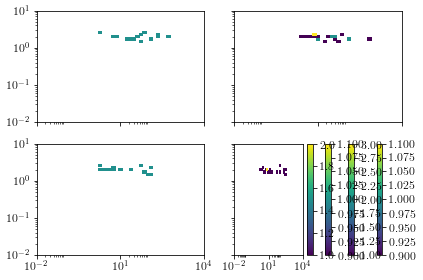

In [32]:
n_side = 2
fig, axarr = plt.subplots(n_side, n_side, sharex=True, sharey=True)
for i, ax in zip(range(n_side**2), axarr.flat):
#     plotting.histogram_2D(df_sim['tank_dists'].values[i], df_sim['tank_charges'].values[i],
#                           bins=(np.logspace(-2, 4, 50), np.logspace(0, 3, 50)), ax=ax,
#                           log_counts=False, logx=False, logy=False, colorbar=False)
    hist = make_charge_dist_hist(df_sim['tank_charges'].values[i], df_sim['tank_dists'].values[i])
    print(hist.sum())
    hist = np.ma.masked_where(hist == 0, hist)
    im = ax.pcolormesh(dist_bins, charge_bins, hist)
    cb = plt.colorbar(im)
#     ax = sns.heatmap(hist, ax=ax, xticklabels=dist_bins[:-1].astype(str))
#     ax.imshow(hist)
#     ax.scatter(np.log10(df_sim['tank_dists'].values[i]),
#                np.log10(df_sim['tank_charges'].values[i]))
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log")
# plt.tight_layout()
plt.show()

/home/jbourbeau/.local/lib/python2.7/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


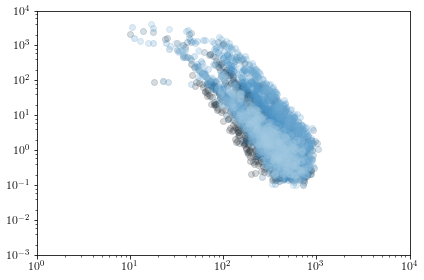

In [6]:
num_samples = 50
with sns.color_palette("Blues_d", num_samples):
    fig, ax = plt.subplots()
    for i in range(num_samples):
        ax.scatter(df_sim['tank_dists'].values[i],
                   df_sim['tank_charges'].values[i], alpha=0.2)
    ax.set_xlim([1e0, 1e4])        
    ax.set_ylim([1e-3, 1e4])        
    ax.set_yscale("log", nonposy='clip')
    ax.set_xscale("log")
    # plt.tight_layout()
    plt.show()

In [7]:
def LDF(beta, log_s125, r):
    return 10**log_s125 * (r/125)**(-beta-0.303*np.log10(r/125))

2.88650088879 0.300849604363
1.43955518677 0.300849604363
2.95602467801 0.887908461397
2.40548344906 0.887908461397
3.31569026441 0.458840155992
2.14098650078 0.458840155992
2.97201777135 1.44564143712
2.65965477183 1.44564143712


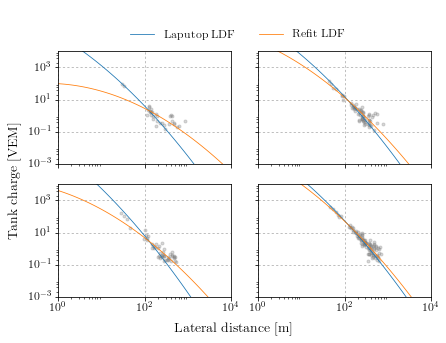

In [13]:
n_side = 2
distances = np.logspace(0, 4, 100)
# print(distances)
# with sns.color_palette("Blues_d", num_samples):
fig, axarr = plt.subplots(n_side, n_side, sharex=True, sharey=True)
random_subset_df = df_sim.sample(n_side**2, random_state=2)
for row_tuple, ax in zip(random_subset_df.iterrows(), axarr.flatten()):
    row_idx, row = row_tuple
    
    ax.scatter(row['tank_dists'], row['tank_charges'], alpha=0.3, marker='.', color='gray')
    
    print(row['lap_beta'], row['log_s125'])
    laputop_ldf = LDF(row['lap_beta'], row['log_s125'], distances)
    l1 = ax.plot(distances, laputop_ldf, marker='None', ls='-', label='Laputop')[0]
    
    print(row['refit_beta'], row['log_s125'])
    refit_ldf = LDF(row['refit_beta'], row['log_s125'], distances)
    l2 = ax.plot(distances, refit_ldf, marker='None', ls='-', label='Re-fit')[0]
    
    ax.set_yscale("log", nonposy='clip')
    ax.set_xscale("log")
    ax.set_xlim([1e0, 1e4])        
    ax.set_ylim([1e-3, 1e4])
    ax.grid()
fig.legend([l1, l2], ['Laputop LDF', 'Refit LDF'], loc='upper center', bbox_to_anchor=(0.55, 1.125),
           frameon=False, ncol=2)
fig.text(0.5, -0.025, 'Lateral distance [m]', ha='center', fontsize=14)
fig.text(-0.025, 0.5, 'Tank charge [VEM]', va='center', rotation='vertical', fontsize=14)
plt.tight_layout()
plt.savefig('/home/jbourbeau/public_html/figures/charge-vs-dist-example.png')
plt.show()

In [38]:
dists = df_sim.tank_dists.values
print(dists)

[ array([ 661.82345535,  494.45487814,  416.95505193,  353.27120235,
        302.03857324,  264.50866298,  264.75784349,  330.81415675,
        322.95446681,  378.57681536,  230.1123634 ,  235.80761465,
        192.38540618,  201.26092021,  208.35621233,  199.97889665,
        256.17613896,  343.70666475,  226.07460175,  231.82515483,
        119.76596282,  128.15030981,   94.78458174,   88.44607897,
        167.1674268 ,  159.48611645,  366.37529722,  643.59947075,
        277.29383872,  273.96139546,  152.71443034,  156.56067963,
         67.83753327,   75.6959883 ,   81.33586296,   72.67109222,
        197.55734667,  188.22677043,  289.3976885 ,  570.63000738,
        276.61098781,  174.59325452,  183.71578459,  126.25800315,
        134.61844127,  182.70362432,  174.82687281,  285.77809334,
        293.89797653,  245.58024923,  255.28326265,  236.69048142])
 array([ 367.79042974,  355.25767674,  380.79149599,  384.12348354,
        533.13885791,  249.2142156 ,  259.03803986,  260.9

In [39]:
dists = pd.Series(np.concatenate(dists).ravel())
dists

0           661.823455
1           494.454878
2           416.955052
3           353.271202
4           302.038573
5           264.508663
6           264.757843
7           330.814157
8           322.954467
9           378.576815
10          230.112363
11          235.807615
12          192.385406
13          201.260920
14          208.356212
15          199.978897
16          256.176139
17          343.706665
18          226.074602
19          231.825155
20          119.765963
21          128.150310
22           94.784582
23           88.446079
24          167.167427
25          159.486116
26          366.375297
27          643.599471
28          277.293839
29          273.961395
               ...    
14975938    330.611360
14975939    322.883365
14975940    327.423746
14975941    318.887764
14975942    338.346669
14975943    341.596957
14975944    416.296257
14975945    409.341668
14975946    500.193989
14975947    495.628883
14975948    597.135795
14975949    594.832530
14975950   

In [47]:
dists.min()

0.16207671883457211

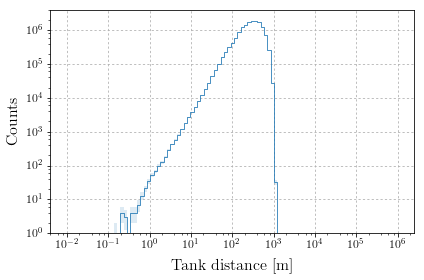

In [50]:
distance_bins = np.logspace(-2, 6, 100)
distance_counts = np.histogram(dists.values, bins=distance_bins)[0]
fig, ax = plt.subplots()
plotting.plot_steps(distance_bins, distance_counts, yerr=np.sqrt(distance_counts), ax=ax)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
ax.set_ylabel('Counts')
ax.set_xlabel('Tank distance [m]')
ax.set_ylim(0)
ax.grid()
plt.savefig('/home/jbourbeau/public_html/figures/tank-distance-hist.png')
plt.show()

In [37]:
fig, ax = plt.subplots()
dists.plot(kind='hist', bins=100, ax=ax)
ax.set_ylabel('Counts')
ax.set_xlabel('Tank distance')
plt.show()

KeyboardInterrupt: 

RuntimeError: dvipng was not able to process the following file:
/home/jbourbeau/.cache/matplotlib/tex.cache/d4507a6187ef2a336b573fe2f8391709.dvi
Here is the full report generated by dvipng: 

No dvipng error report available.